# 단순 선형회귀

In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')

In [30]:
df.head()


,Father,Height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


- 아버지와 아들의 키 발췌

In [31]:
df.columns

Index(['Father', 'Height'], dtype='object')

In [22]:
# Filtrering and Selcting
df =df[df.Gender == 'M'][['Father','Height']]

,Father,Height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5
...,...,...
890,68.5,72.0
891,68.5,70.5
892,68.5,68.7
893,68.5,68.5


In [36]:
# 'Height' 컬럼을 'Son'으로 변경
df.rename(columns={'Height':'Son'},inplace=True)
df.head(3)

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5


In [37]:
# inch 를 Cm으로 바꾸기

df = df * 2.54

In [38]:
df

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070
...,...,...
890,173.99,182.880
891,173.99,179.070
892,173.99,174.498
893,173.99,173.990


- 산점도 그리기

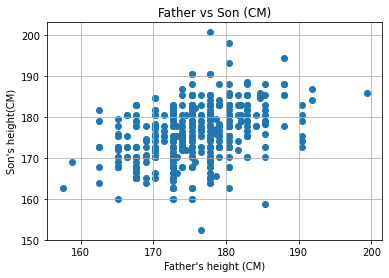

In [41]:
plt.scatter(df.Father,df.Son)
plt.grid()
plt.xlabel("Father's height (CM)")
plt.ylabel("Son's height(CM)")
plt.title('Father vs Son (CM)')
plt.show()

- 회귀선 구하기: Numpy polyfit

In [45]:
fp1 = np.polyfit(df.Father,df.Son, 1) # 1차식으로 아버지와 아들의 키 앞
fp1 

array([ 0.44774792, 97.17763701])

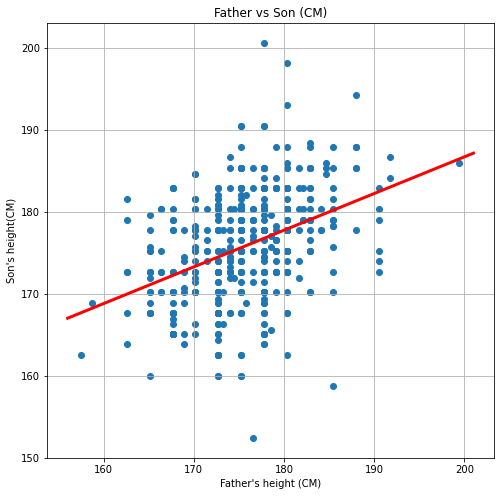

In [47]:
plt.figure(figsize=(8,8))
plt.scatter(df.Father,df.Son)
plt.plot([156,201],[156*fp1[0]+fp1[1],201*fp1[0]+fp1[1]],'r-',lw=3)
plt.grid()
plt.xlabel("Father's height (CM)")
plt.ylabel("Son's height(CM)")
plt.title('Father vs Son (CM)')
plt.show()

In [58]:
X = np.array([156,201])
y = fp1[0]*X+ fp1[1]*X
y

array([15229.5600483 , 19622.70236992])

In [56]:
from sklearn.linear_model import LinearRegression

In [72]:
df.Son.shape

(465,)

In [74]:
# X의 Shape 1차원 --> 2차원으로 바꿔주어야함 
lr = LinearRegression()
lr.fit(df[['Father']],df['Son'])

LinearRegression()

In [78]:
lr.coef_,lr.intercept_

(array([0.44774792]), 97.17763700739346)

# 잔차 제곱의 합 (RSS : Residual Sum of Square)

In [79]:
lr._residues

17556.59951549399

In [81]:
# R squared - 성능 평가 요소
lr.score(df[['Father']],df['Son'])

0.15312927478306992

In [82]:
from sklearn.metrics import r2_score

In [83]:
r2_score(df[['Father']],df['Son'])

-0.4144097727980691